 ### Here's we are going to explore
 1. How to wake up some data that we can apply PCA to.
 2. How to use PCA() function from sklearn to do PCA
 3. How to determine how much variation each principal component accounts for
 4. How to draw a fancy PCA graph using matplotlib
 5. How to examine the loading scores to determine what variables have the largest effect on graph.

In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# lets generate data

''' The first thing we do is generate an array of 100 gene
    names. Since this is just an example dataset, our gene name 
    are super boring: "gene1", "gene2", etc
'''
genes = ["gene"+ str(i) for i in range(1, 101)]

''' Now we create arrays of sample names,
    we have 5 "wild type" or "wt" samples
    and 5 "knocs out" or "ko" samples
'''
wt = ["wt"+ str(i) for i in range(1,6)]
ko = ["ko"+ str(i) for i in range(1,6)]

# Create pandas dataframe to store metadata
data = pd.DataFrame(columns= [*wt, *ko], index = genes) # * unpack the "wt" & "ko" arrays
                                                       # So that coloum names are a single arrays that looks like below
                                                       # [wt1, wt2, ... , wt6, ko1, ko2, .... , ko6]
                                                       # without * it will create array like
                                                       # [[wt1, wt2, ... , wt6],[ko1, ko2, .... , ko6]]
# Create random data
''' For each gene in the index (i.e. gene1, gene2, ..., gene100)
    we create 5 values for the "wt" sample and 5 values for the "ko" sample
'''

for gene in  data.index:
    data.loc[gene, 'wt1':'wt5']= np.random.poisson(lam= rd.randrange(10,1000), size = 5)
    data.loc[gene, 'ko1': 'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
    
    """ The made up data comes from two poisson
        distribution: one for the wt sample and one for theko sample
        And
        For each gene, we select a new mean for the poisson distribution.
        the means can vary between 10 to 1000
    """

In [3]:
data.head(10)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,402,399,388,373,418,618,579,616,598,569
gene2,582,552,567,558,567,530,501,503,521,531
gene3,1001,993,934,902,936,350,381,391,394,365
gene4,492,466,495,523,486,959,983,907,959,919
gene5,637,621,578,639,631,822,821,894,874,833
gene6,342,359,360,344,359,927,981,966,985,962
gene7,337,336,301,313,342,241,285,212,226,221
gene8,183,162,170,181,166,812,778,750,771,774
gene9,893,894,845,845,879,169,137,158,171,144
gene10,32,28,27,15,25,279,263,285,300,293


In [4]:
print(data.shape)

''' Return dimention of matrix 
    in our case it is (100,10), 100 gene by 10 total sample
'''

(100, 10)


' Return dimention of matrix \n    in our case it is (100,10), 100 gene by 10 total sample\n'

In [5]:
# Before we do PCA we have to center and scale the data

scaled_data = preprocessing.scale(data.T)
                                # Notice that we are passing in the transpose of our data.
                                # The scale function expect the sample to be rows instead of columns
''' Note : We use samples as coloumns inthis example because that is often how genomic
        data, you can store it however is easiest for you. there's no requriment that
        sample be rows or coloumns, just be aware thar if it is columns, you'll need to
        transpose it before analysis.
'''
            
""" After ceantering, the average value for each gene
    will be 0 and after scaling, the standard deviation for the values for
    each gene will be 1
"""



' After ceantering, the average value for each gene\n    will be 0 and after scaling, the standard deviation for the values for\n    each gene will be 1\n'

##### One another note :
 Alternatively, we could use following method to scale our data.
     <font color='green'>StandardScaler().fit_trransform(data.T)</font>

This second method is more commonly used for Machine learning, and that's what sklearn was designed to do

In [6]:
# Create PCA object
pca = PCA()

pca.fit(scaled_data) # here we do all math, calculatin loading scores and variation 
                     # each PC account for.

pca_data = pca.transform(scaled_data) # and this is where we generate coordinates for a
                                      # PCA graph based on the loading score and the scaled data

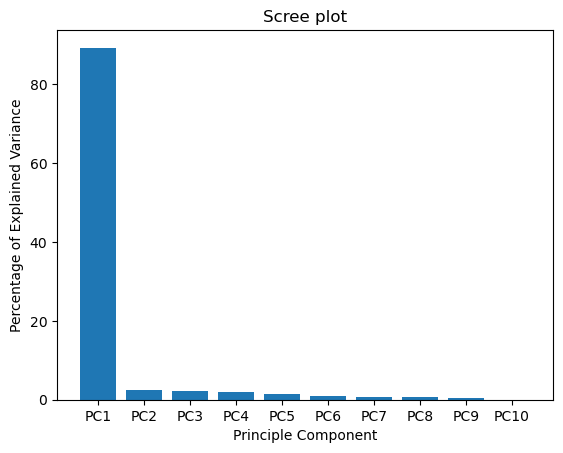

In [7]:
# Lets we calculate the scree plot to find out how many principale componenet going to final plot

''' First we do is calculate the presentage of variation that each
    principal componenet accounts for.
'''
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

# Create lables for scree plot
labels = ["PC"+ str(i) for i in range(1, len(per_var)+1)]

# Create bar plot
plt.bar(x = range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principle Component")
plt.title("Scree plot")
plt.show()

From Above graph, we can see, Almost all of the variation is along the first PC,

So 2-D graph using PC1 and PC2 should do good job representing the original data.

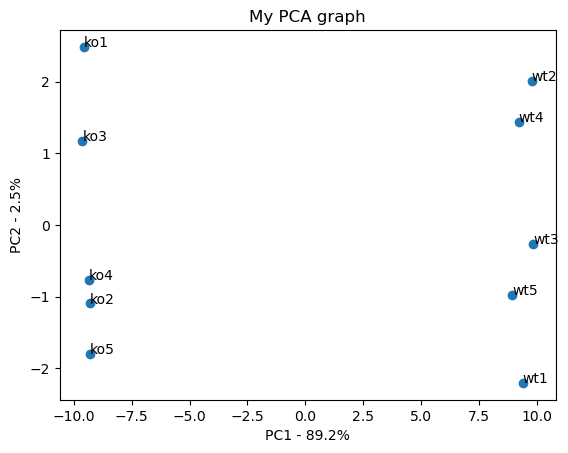

In [8]:
""" To draw a PCA plot, we'll first put the new coordinates,
    created by pca.transfrom(scaled.data), into a nice matrix
    where the rows have sample labels and the columns have PC labels.
"""
pca_df = pd.DataFrame(pca_data, index= [*wt, *ko], columns = labels)

# Lets draw scatter plot with a title and nice axis labels
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
    # This loop adds sample name to the graph
    
plt.show()

#### Lastly, let's look at the loading score for PC1 to determine
#### which genes had the largest influence on seperating the two clusters along X-axis.

In [9]:
# Create pandas series object with the loading score in PC1
loading_scores = pd.Series(pca.components_[0], index= genes)
                            # Note: The PCs are zero-indexed, so PC1 =0

# Now we sort the loading score based onthere magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

# Lets get name of top 10 index
top_10_genes = sorted_loading_scores[0:10].index.values

#print top 10 gene names and their corresponding loading scores
print(loading_scores[top_10_genes])

gene80    0.105829
gene16   -0.105823
gene48    0.105820
gene33   -0.105789
gene59   -0.105776
gene87   -0.105769
gene75    0.105735
gene20   -0.105723
gene8    -0.105710
gene44    0.105705
dtype: float64


And this is what we get, these values are super similer,
so a lot of genes played a role in separating the samples,
rather than just one or two.